<center>
<img src="https://habrastorage.org/files/fd4/502/43d/fd450243dd604b81b9713213a247aa20.jpg" />
    
## [mlcourse.ai](http://mlcourse.ai) – Open Machine Learning Course 
### <center> Author: Ilya Larchenko, ODS Slack ilya_l
    
## <center> Individual data analysis project

## 1. Data description

__This project is done as a part of  an [open Machine Learning course](http://mlcourse.ai) by [OpenDataScience](http://ods.ai/)__

__I will analyse California Housing Data (1990). It can be downloaded from Kaggle [ https://www.kaggle.com/harrywang/housing ]__

We will predict the median price of household in block. 

In [1]:
import pandas as pd
import numpy as np
import os
%matplotlib inline

import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')

In [2]:
# change this if needed
PATH_TO_DATA = 'data'

In [3]:
full_df = pd.read_csv(os.path.join(PATH_TO_DATA, 'housing.csv'))
print(full_df.shape)
full_df.head()

(20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Data consists of 20640 rows and 10 features:

1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
4. totalRooms: Total number of rooms within a block
5. totalBedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. medianHouseValue: Median house value for households within a block (measured in US Dollars)
10. oceanProximity: Location of the house w.r.t ocean/sea

*median_house_value* is our target feature, we will use other features to predict it.

The task is to predict how much the houses in particular block cost (the median) based on information of blocks location and basic sociodemographic data

Let's divide dataset into train (75%) and test (25%).

In [4]:
%%time
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(full_df, shuffle = True, test_size = 0.25, random_state=17)
train_df=train_df.copy()
test_df=test_df.copy()
print(train_df.shape)
print(test_df.shape)

(15480, 10)
(5160, 10)
CPU times: user 276 ms, sys: 50.8 ms, total: 326 ms
Wall time: 378 ms


All futher analysis we will do with the test set. But feature generation and processing will be simmultaneously done on both sets.

## 2-3. Primary data analysis / Primary visual data analysis

In [5]:
train_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,15480.000000,15480.000000,15480.000000,15480.00000,15330.000000,15480.000000,15480.000000,15480.000000,15480.000000
mean,-119.573557,35.636937,28.673256,2637.47177,536.281018,1422.857364,498.022610,3.883162,207066.410724
std,2.007366,2.141362,12.627921,2157.77458,416.009316,1120.156668,378.993113,1.912431,115618.405834
min,-124.350000,32.550000,1.000000,2.00000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.810000,33.930000,18.000000,1452.00000,296.000000,786.000000,279.000000,2.567225,119600.000000
50%,-118.510000,34.260000,29.000000,2134.00000,434.000000,1164.000000,408.000000,3.543050,179900.000000
75%,-118.007500,37.720000,37.000000,3149.25000,647.000000,1725.000000,606.000000,4.766400,265100.000000
max,-114.470000,41.950000,52.000000,32054.00000,5419.000000,35682.000000,5050.000000,15.000100,500001.000000


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15480 entries, 3400 to 10863
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           15480 non-null  float64
 1   latitude            15480 non-null  float64
 2   housing_median_age  15480 non-null  float64
 3   total_rooms         15480 non-null  float64
 4   total_bedrooms      15330 non-null  float64
 5   population          15480 non-null  float64
 6   households          15480 non-null  float64
 7   median_income       15480 non-null  float64
 8   median_house_value  15480 non-null  float64
 9   ocean_proximity     15480 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.3+ MB


We can see that most columns has no nan values (except total_bedrooms), most features has float format, only 1 feature is categorical - ocean_proximity.

In [7]:
train_df[pd.isnull(train_df).any(axis=1)].head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1493,-122.01,37.94,23.0,3741.0,NaN,1339.0,499.0,6.7061,322300.0,NEAR BAY
18177,-122.00,37.36,17.0,2070.0,NaN,797.0,275.0,8.6155,411200.0,<1H OCEAN
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
17840,-121.89,37.44,8.0,2534.0,NaN,1527.0,364.0,7.8532,422800.0,<1H OCEAN
11096,-117.87,33.83,27.0,2287.0,NaN,1140.0,351.0,5.6163,231000.0,<1H OCEAN
18332,-122.16,37.45,47.0,4234.0,NaN,1808.0,1093.0,4.2297,425000.0,NEAR BAY
15975,-122.45,37.77,52.0,2602.0,NaN,1330.0,647.0,3.5435,278600.0,NEAR BAY
4591,-118.28,34.06,42.0,2472.0,NaN,3795.0,1179.0,1.2254,162500.0,<1H OCEAN
12414,-116.21,33.75,22.0,894.0,NaN,830.0,202.0,3.0673,68200.0,INLAND
13311,-117.61,34.08,12.0,4427.0,NaN,2400.0,843.0,4.7147,158700.0,INLAND


There is no obvious reasons for some total_bedrooms to be NaN. The number of NaNs is about 1% of total dataset. Maybe we could just drop this rows or fill it with mean/median values, but let's wait for a while, and deal with blanks after initial data analysis in a smarter manner.

Let's create the list of numeric features names (it will be useful later).

In [8]:
numerical_features=list(train_df.columns)
numerical_features.remove('ocean_proximity')
numerical_features.remove('median_house_value')
print(numerical_features)

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']


Let's look at target feature distribition

<Axes: >

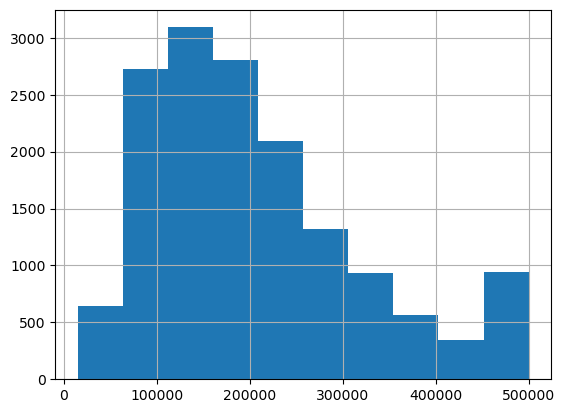

In [9]:
train_df['median_house_value'].hist()

We can visually see that distribution is skewed and not normal. Also it seems that the values are clipped somewhere near 500 000. We can check it numerically.

In [10]:
max_target=train_df['median_house_value'].max()
print("The largest median value:",max_target)
print("The # of values, equal to the largest:", sum(train_df['median_house_value']==max_target))
print("The % of values, equal to the largest:", sum(train_df['median_house_value']==max_target)/train_df.shape[0])

The largest median value: 500001.0
The # of values, equal to the largest: 742
The % of values, equal to the largest: 0.0479328165374677


Almost 5% of all values = exactly 500 001. It proves our clipping theory. Let's check the clipping of small values:

In [11]:
min_target=train_df['median_house_value'].min()
print("The smallest median value:",min_target)
print("The # of values, equal to the smallest:", sum(train_df['median_house_value']==min_target))
print("The % of values, equal to the smallest:", sum(train_df['median_house_value']==min_target)/train_df.shape[0])

The smallest median value: 14999.0
The # of values, equal to the smallest: 4
The % of values, equal to the smallest: 0.00025839793281653745


This time it looks much better, a little bit artificial value 14 999 - is common for prices. And there are only 4 such values. So probably the small values are not clipped.

Let's conduct some normality tests:

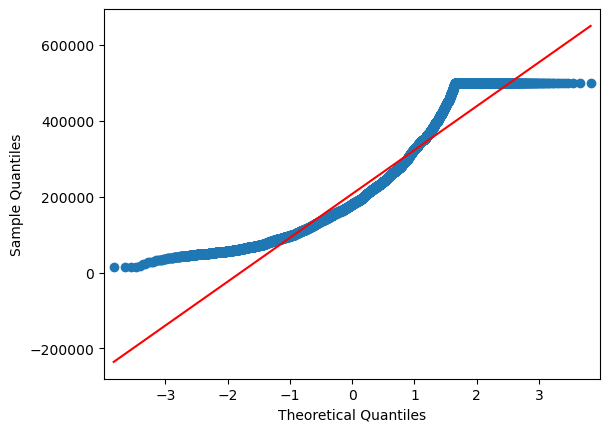

In [13]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

qqplot(train_df['median_house_value'], line='s')
pyplot.show()

In [14]:
from scipy.stats import normaltest

stat, p = normaltest(train_df['median_house_value'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

Statistics=1831.228, p=0.000
The null hypothesis can be rejected


QQ-plot and D’Agostino and Pearson’s normality test show that the distribution is far from normal. We can try to use log(1+n) to make it more normal:

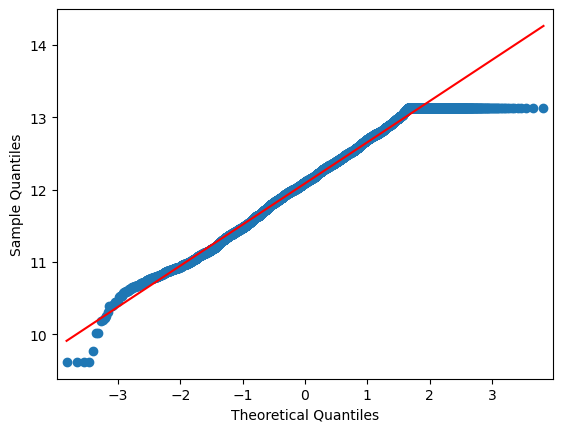

In [15]:
target_log=np.log1p(train_df['median_house_value'])
qqplot(target_log, line='s')
pyplot.show()

In [16]:
stat, p = normaltest(target_log)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

Statistics=252.481, p=0.000
The null hypothesis can be rejected


This graph looks much better, the only non-normal parts are clipped high prices and very low prices. Unfortunately we can not reconstruct clipped data and statistically the distribution it is still not normal - p-value = 0, the null hypothesis of distribution normality can be rejected.

Anyway, predicting of target_log instead of target can be a good choice for us, but we still should check it during model validation phase.

In [17]:
train_df['median_house_value_log']=np.log1p(train_df['median_house_value'])
test_df['median_house_value_log']=np.log1p(test_df['median_house_value'])

Now let's analyze numerical features. First of all we need to look at their distributions.

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>, <Axes: >]],
      dtype=object)

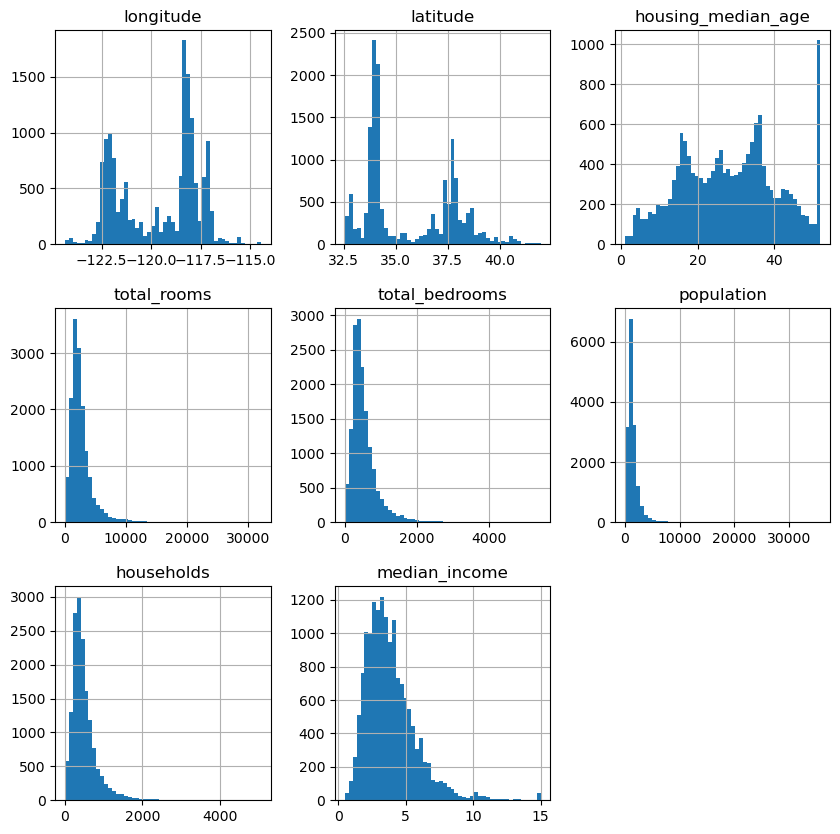

In [18]:
train_df[numerical_features].hist(bins=50, figsize=(10, 10))

Some features are signifacantly skewed, and our "log trick" should be heplfull

In [19]:
skewed_features=['households','median_income','population', 'total_bedrooms', 'total_rooms']
log_numerical_features=[]
for f in skewed_features:
    train_df[f + '_log']=np.log1p(train_df[f])
    test_df[f + '_log']=np.log1p(test_df[f])
    log_numerical_features.append(f + '_log')

array([[<Axes: title={'center': 'households_log'}>,
        <Axes: title={'center': 'median_income_log'}>],
       [<Axes: title={'center': 'population_log'}>,
        <Axes: title={'center': 'total_bedrooms_log'}>],
       [<Axes: title={'center': 'total_rooms_log'}>, <Axes: >]],
      dtype=object)

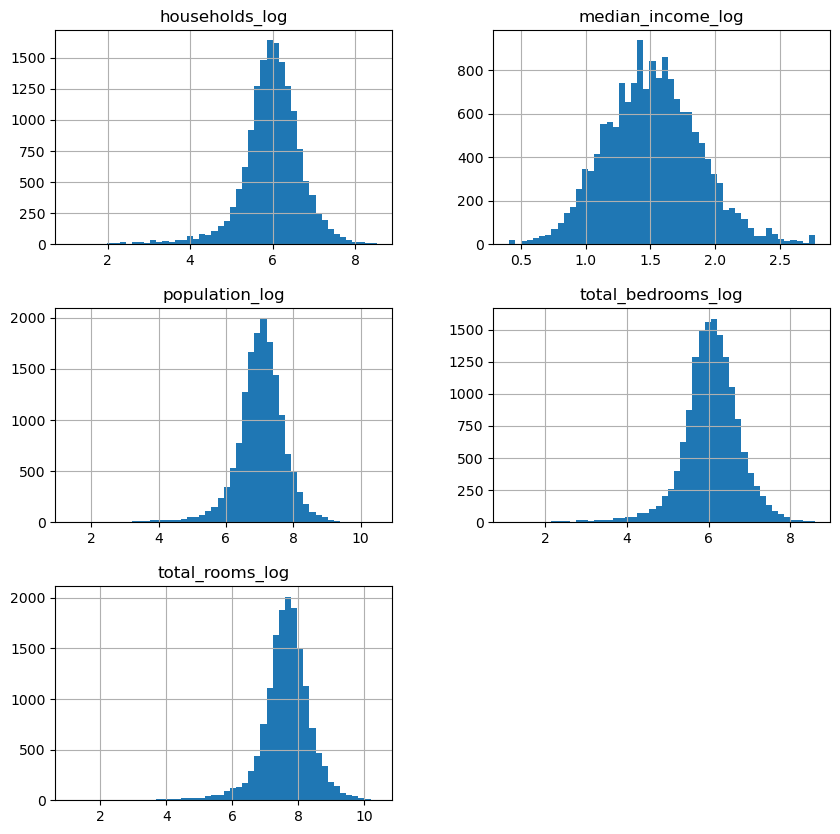

In [20]:
train_df[log_numerical_features].hist(bins=50, figsize=(10, 10))

Our new features looks much better (during the modeling phase we can use either original, new ones or both of them)

housing_median_age looks clipped as well. Let's look at it's highest value precisely.

In [21]:
max_house_age=train_df['housing_median_age'].max()
print("The largest value:",max_house_age)
print("The # of values, equal to the largest:", sum(train_df['housing_median_age']==max_house_age))
print("The % of values, equal to the largest:", sum(train_df['housing_median_age']==max_house_age)/train_df.shape[0])

The largest value: 52.0
The # of values, equal to the largest: 978
The % of values, equal to the largest: 0.0631782945736434


It is very likely the data is clipped (there are also a small chance that in 1938 there was a great reconstruction project in California but it seems less likely). We can't recreate original values, but it can be useful to create new binary value indicating the clipping of the house age.

In [22]:
train_df['age_clipped']=train_df['housing_median_age']==max_house_age
test_df['age_clipped']=test_df['housing_median_age']==max_house_age

In [25]:
train_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_house_value_log,households_log,median_income_log,population_log,total_bedrooms_log,total_rooms_log,age_clipped
3400,-118.35,34.28,30.0,3214.0,513.0,1700.0,533.0,4.6944,248200.0,<1H OCEAN,12.421994,6.280396,1.739483,7.438972,6.242223,8.075583,False
9159,-118.45,34.44,16.0,13406.0,2574.0,7030.0,2440.0,4.6861,187900.0,<1H OCEAN,12.143671,7.800163,1.738025,8.858084,7.853605,9.503532,False
10592,-117.78,33.69,16.0,3400.0,501.0,1575.0,488.0,6.0961,295500.0,<1H OCEAN,12.596427,6.192362,1.959545,7.362645,6.218600,8.131825,False
4281,-118.32,34.09,27.0,210.0,98.0,332.0,112.0,2.5556,175000.0,<1H OCEAN,12.072547,4.727388,1.268524,5.808142,4.595120,5.351858,False
230,-122.20,37.79,40.0,1060.0,256.0,667.0,235.0,4.1739,169600.0,NEAR BAY,12.041204,5.463832,1.643627,6.504288,5.549076,6.966967,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9529,-123.15,38.94,22.0,2163.0,436.0,1048.0,358.0,2.7171,95800.0,<1H OCEAN,11.470028,5.883322,1.312944,6.955593,6.079933,7.679714,False
406,-122.27,37.90,52.0,2041.0,270.0,671.0,253.0,6.9414,417500.0,NEAR BAY,12.942042,5.537334,2.072090,6.510258,5.602119,7.621685,True
13702,-117.23,34.11,22.0,1162.0,221.0,995.0,244.0,2.5875,81300.0,INLAND,11.305914,5.501258,1.277456,6.903747,5.402677,7.058758,False
2191,-120.07,36.74,19.0,2627.0,502.0,1295.0,441.0,3.0870,88200.0,INLAND,11.387374,6.091310,1.407811,7.167038,6.220590,7.873978,False


Now we will analyse correleation between features and target variable

<Axes: >

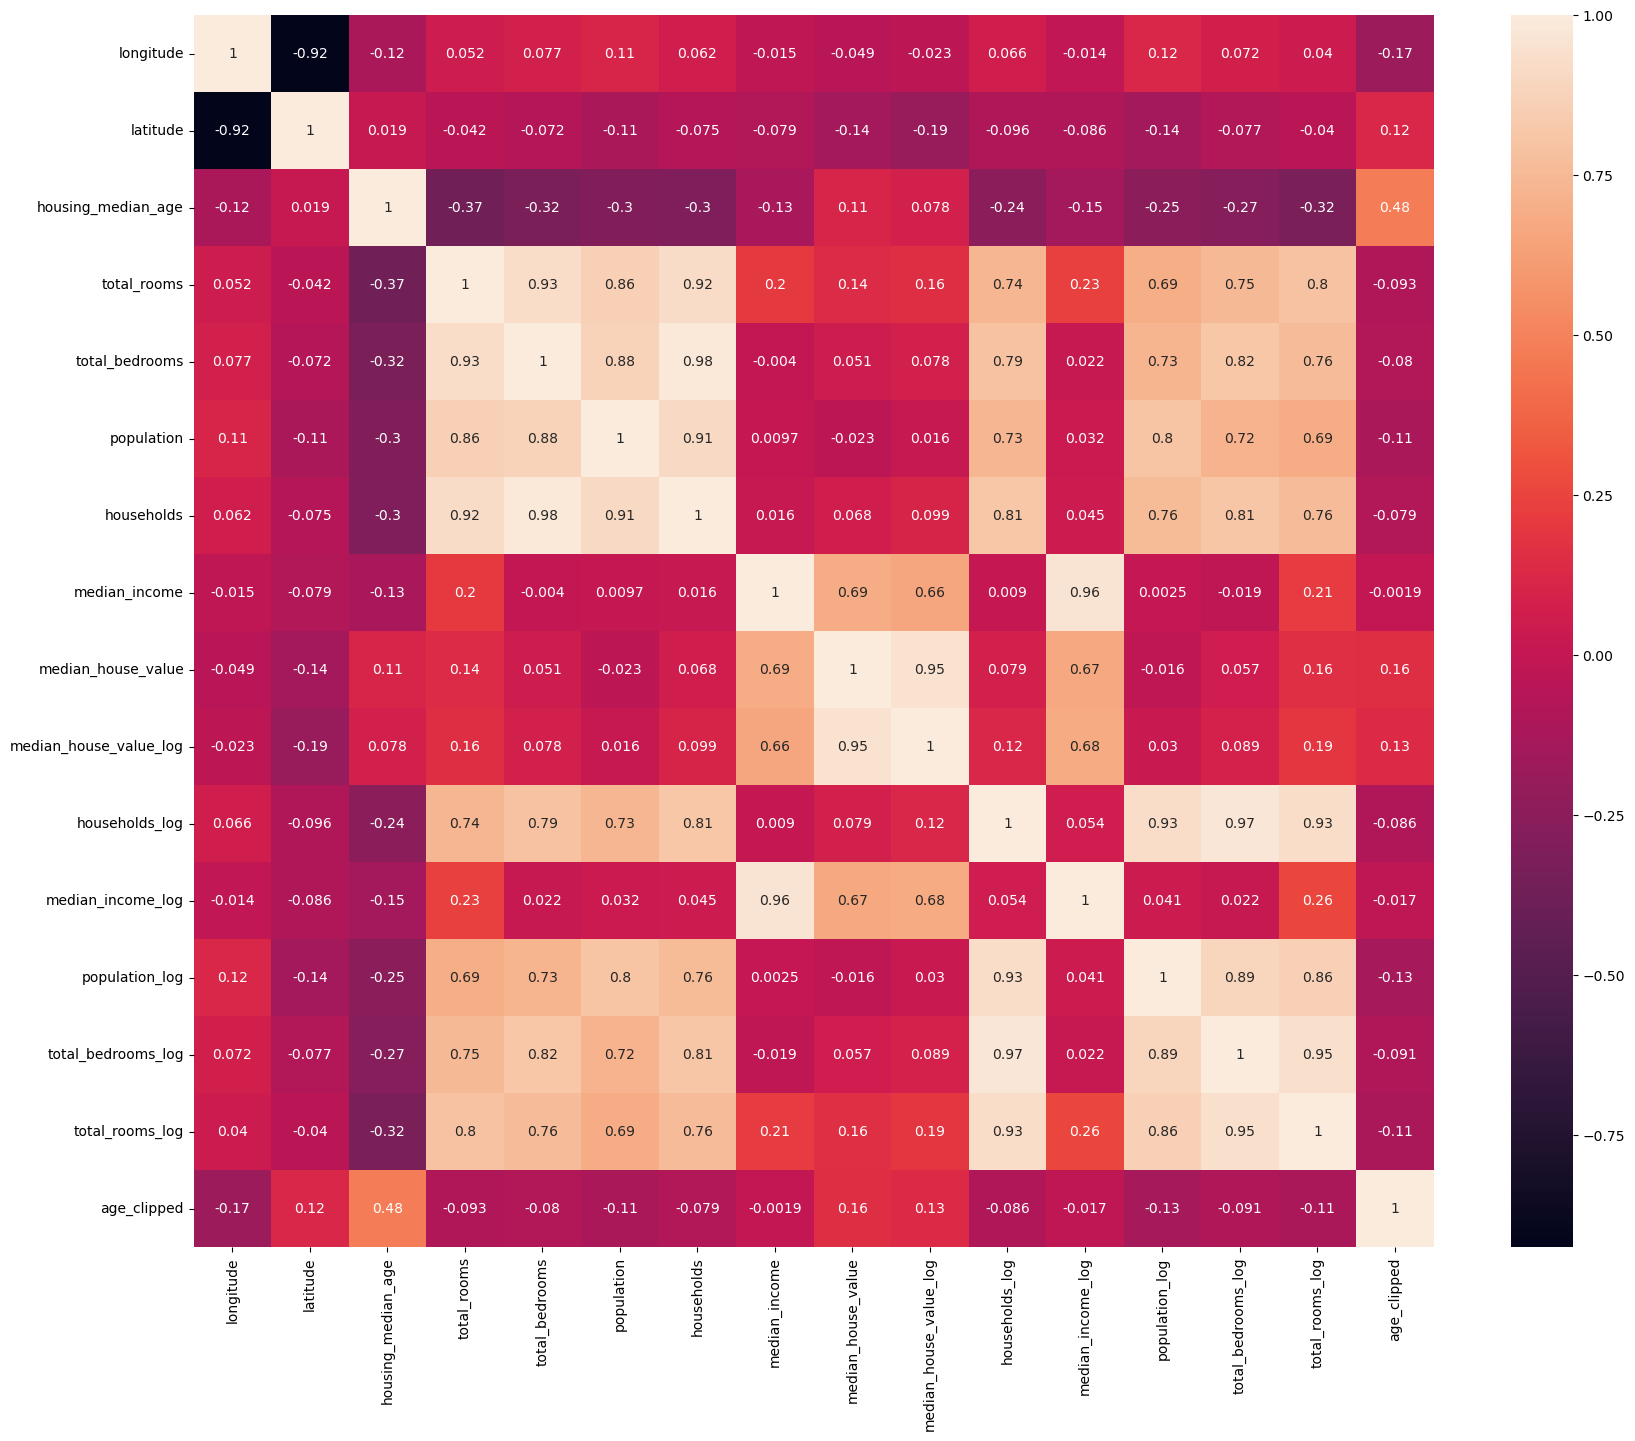

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_y = pd.DataFrame(train_df).drop(columns=['ocean_proximity']).corr()
plt.rcParams['figure.figsize'] = (20, 16)
sns.heatmap(corr_y, 
            xticklabels=corr_y.columns.values,
            yticklabels=corr_y.columns.values, annot=True)

We can see some (maybe obvious) patterns here:
    - House values are significantly correlated with median income
    - Number of households is not 100% correlated with population, we can try to add average_size_of_household as a feature
    - Longitude and Latitude should be analyzed separately (just a correlation with target variable is not very useful)
    - There is a set of highly correlated features: number of rooms, bedrooms, population and households. It can be useful to reduce dimensionality of this subset, especially if we use linear models
    - total_bedrooms is one of these highly correlated features, it means we can fill NaN values with high precision using simplest linear regression

Let's try to fill NaNs with simple linear regression:

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin = LinearRegression()

# we will train our model based on all numerical non-target features with not NaN total_bedrooms
appropriate_columns = train_df.drop(['median_house_value', 'median_house_value_log',
                                     'ocean_proximity', 'total_bedrooms_log'], axis=1)
train_data = appropriate_columns[~pd.isnull(train_df).any(axis=1)]

# model will be validated on 25% of train dataset
# theoretically we can use even our test_df dataset (as we don't use target) for this task, but we will not
temp_train, temp_valid = train_test_split(
    train_data, shuffle=True, test_size=0.25, random_state=17)

lin.fit(temp_train.drop(['total_bedrooms'], axis=1),
        temp_train['total_bedrooms'])

np.sqrt(mean_squared_error(lin.predict(temp_valid.drop(['total_bedrooms'], axis=1)),
                           temp_valid['total_bedrooms']))

64.53336471582223

RMSE on a validation set is 64.5. Let's compare this with the best constant prediction - what if we fill NaNs with mean value:

In [28]:
np.sqrt(mean_squared_error(np.ones(len(temp_valid['total_bedrooms']))*temp_train['total_bedrooms'].mean(),
                           temp_valid['total_bedrooms']))

425.3238618340849

Obviously our linear regression approach is much better. Let's train our model on whole train dataset and apply it to the rows with blanks. But preliminary we will "remember" the rows with NaNs, because there is a chance, that it can contain useful information.

In [29]:
lin.fit(train_data.drop(['total_bedrooms'],axis=1), train_data['total_bedrooms'])

train_df['total_bedrooms_is_nan']=pd.isnull(train_df).any(axis=1).astype(int)
test_df['total_bedrooms_is_nan']=pd.isnull(test_df).any(axis=1).astype(int)

train_df['total_bedrooms'].loc[pd.isnull(train_df).any(axis=1)]=\
lin.predict(train_df.drop(['median_house_value','median_house_value_log','total_bedrooms','total_bedrooms_log',
               'ocean_proximity','total_bedrooms_is_nan'],axis=1)[pd.isnull(train_df).any(axis=1)])

test_df['total_bedrooms'].loc[pd.isnull(test_df).any(axis=1)]=\
lin.predict(test_df.drop(['median_house_value','median_house_value_log','total_bedrooms','total_bedrooms_log',
               'ocean_proximity','total_bedrooms_is_nan'],axis=1)[pd.isnull(test_df).any(axis=1)])

#linear regression can lead to negative predictions, let's change it
test_df['total_bedrooms']=test_df['total_bedrooms'].apply(lambda x: max(x,0))
train_df['total_bedrooms']=train_df['total_bedrooms'].apply(lambda x: max(x,0))

Let's update 'total_bedrooms_log' and check if there are no NaNs left

In [30]:
train_df['total_bedrooms_log']=np.log1p(train_df['total_bedrooms'])
test_df['total_bedrooms_log']=np.log1p(test_df['total_bedrooms'])

In [31]:
print(train_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 15480 entries, 3400 to 10863
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   longitude               15480 non-null  float64
 1   latitude                15480 non-null  float64
 2   housing_median_age      15480 non-null  float64
 3   total_rooms             15480 non-null  float64
 4   total_bedrooms          15480 non-null  float64
 5   population              15480 non-null  float64
 6   households              15480 non-null  float64
 7   median_income           15480 non-null  float64
 8   median_house_value      15480 non-null  float64
 9   ocean_proximity         15480 non-null  object 
 10  median_house_value_log  15480 non-null  float64
 11  households_log          15480 non-null  float64
 12  median_income_log       15480 non-null  float64
 13  population_log          15480 non-null  float64
 14  total_bedrooms_log      15480 non-null  

After filling of blanks let's have a closer look on dependences between some numerical features

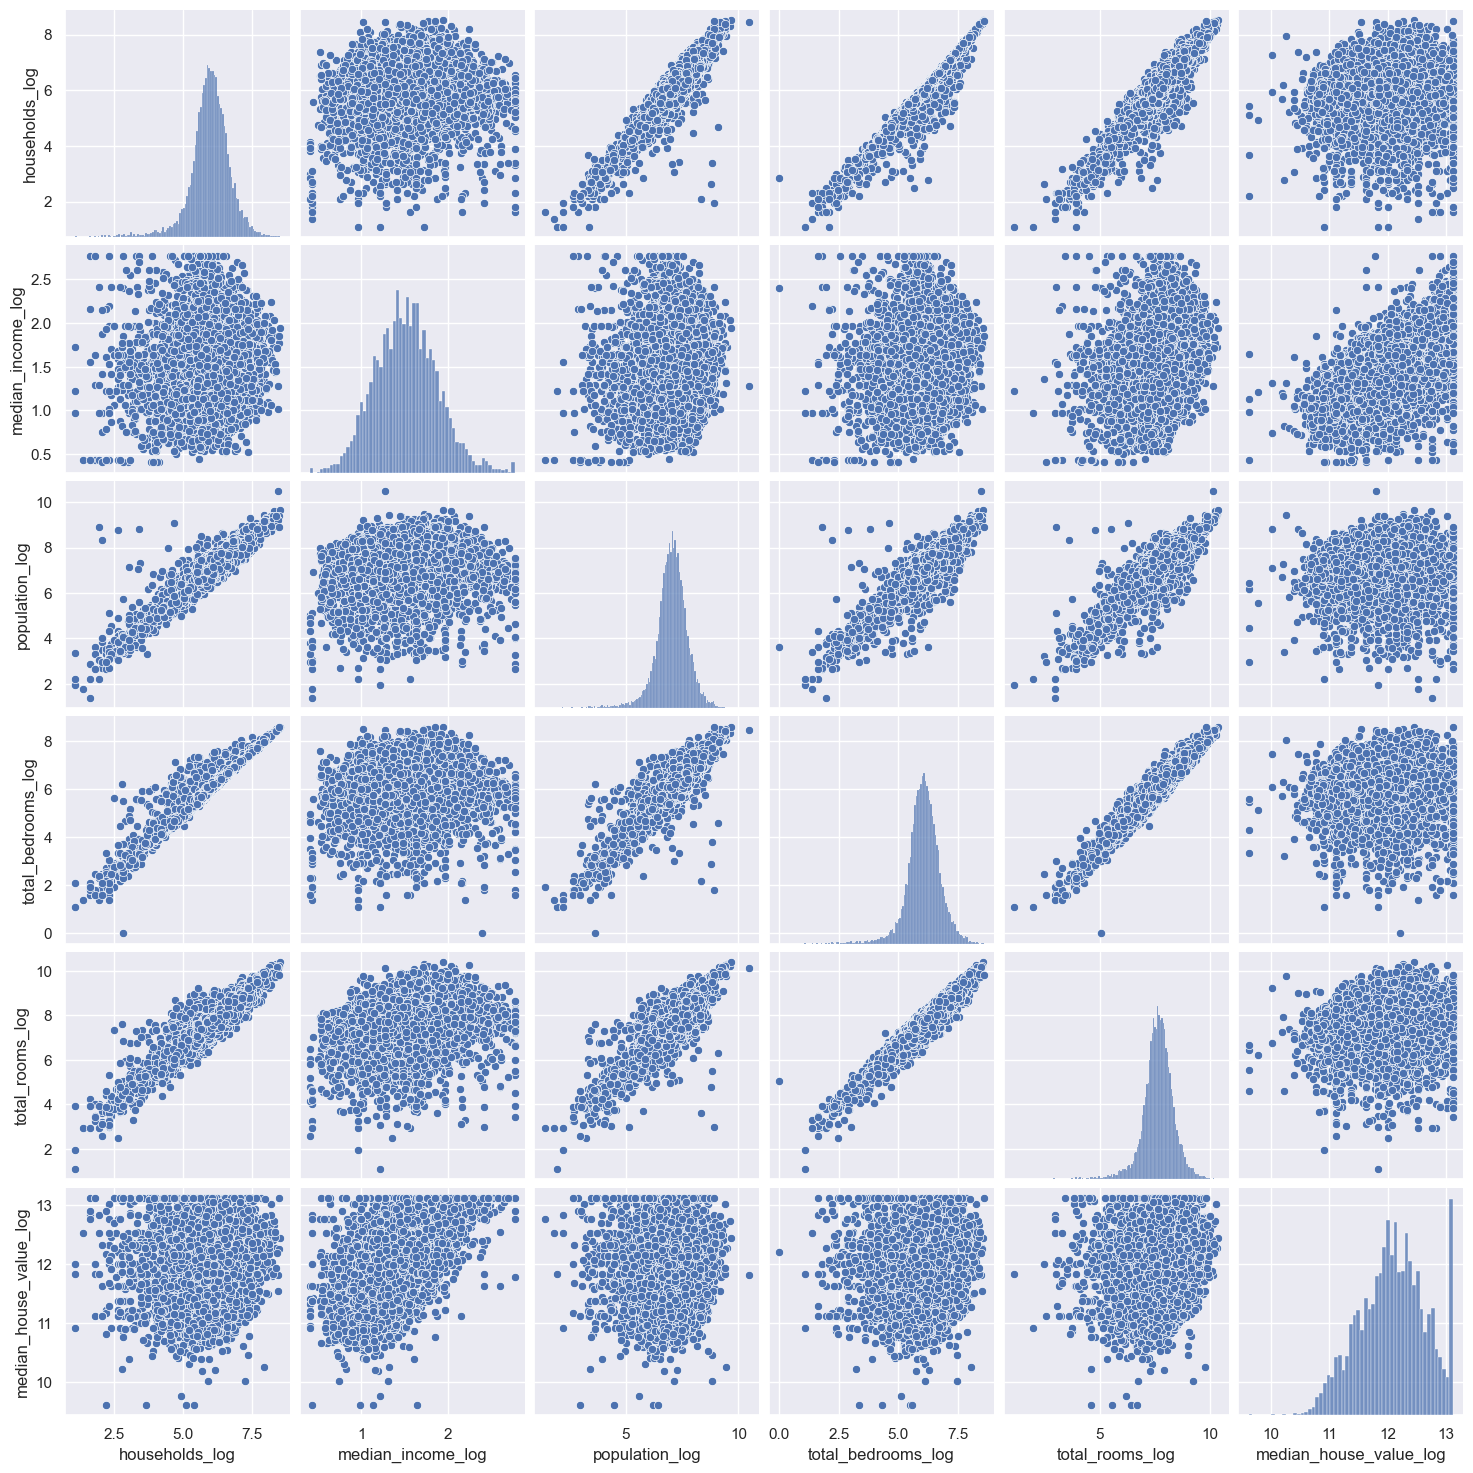

In [32]:
sns.set()
sns.pairplot(train_df[log_numerical_features+['median_house_value_log']])

It seems there are no new insights about numerical features (only confirmation of the old ones).

Let's try to do the same thing but for the local (geographically) subset of our data.

Data points within treshhold: 500


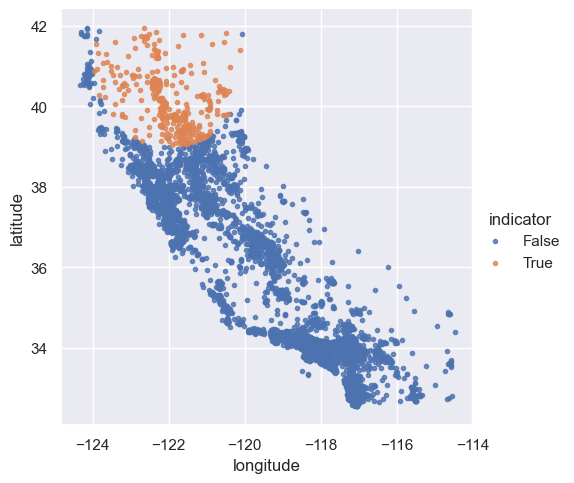

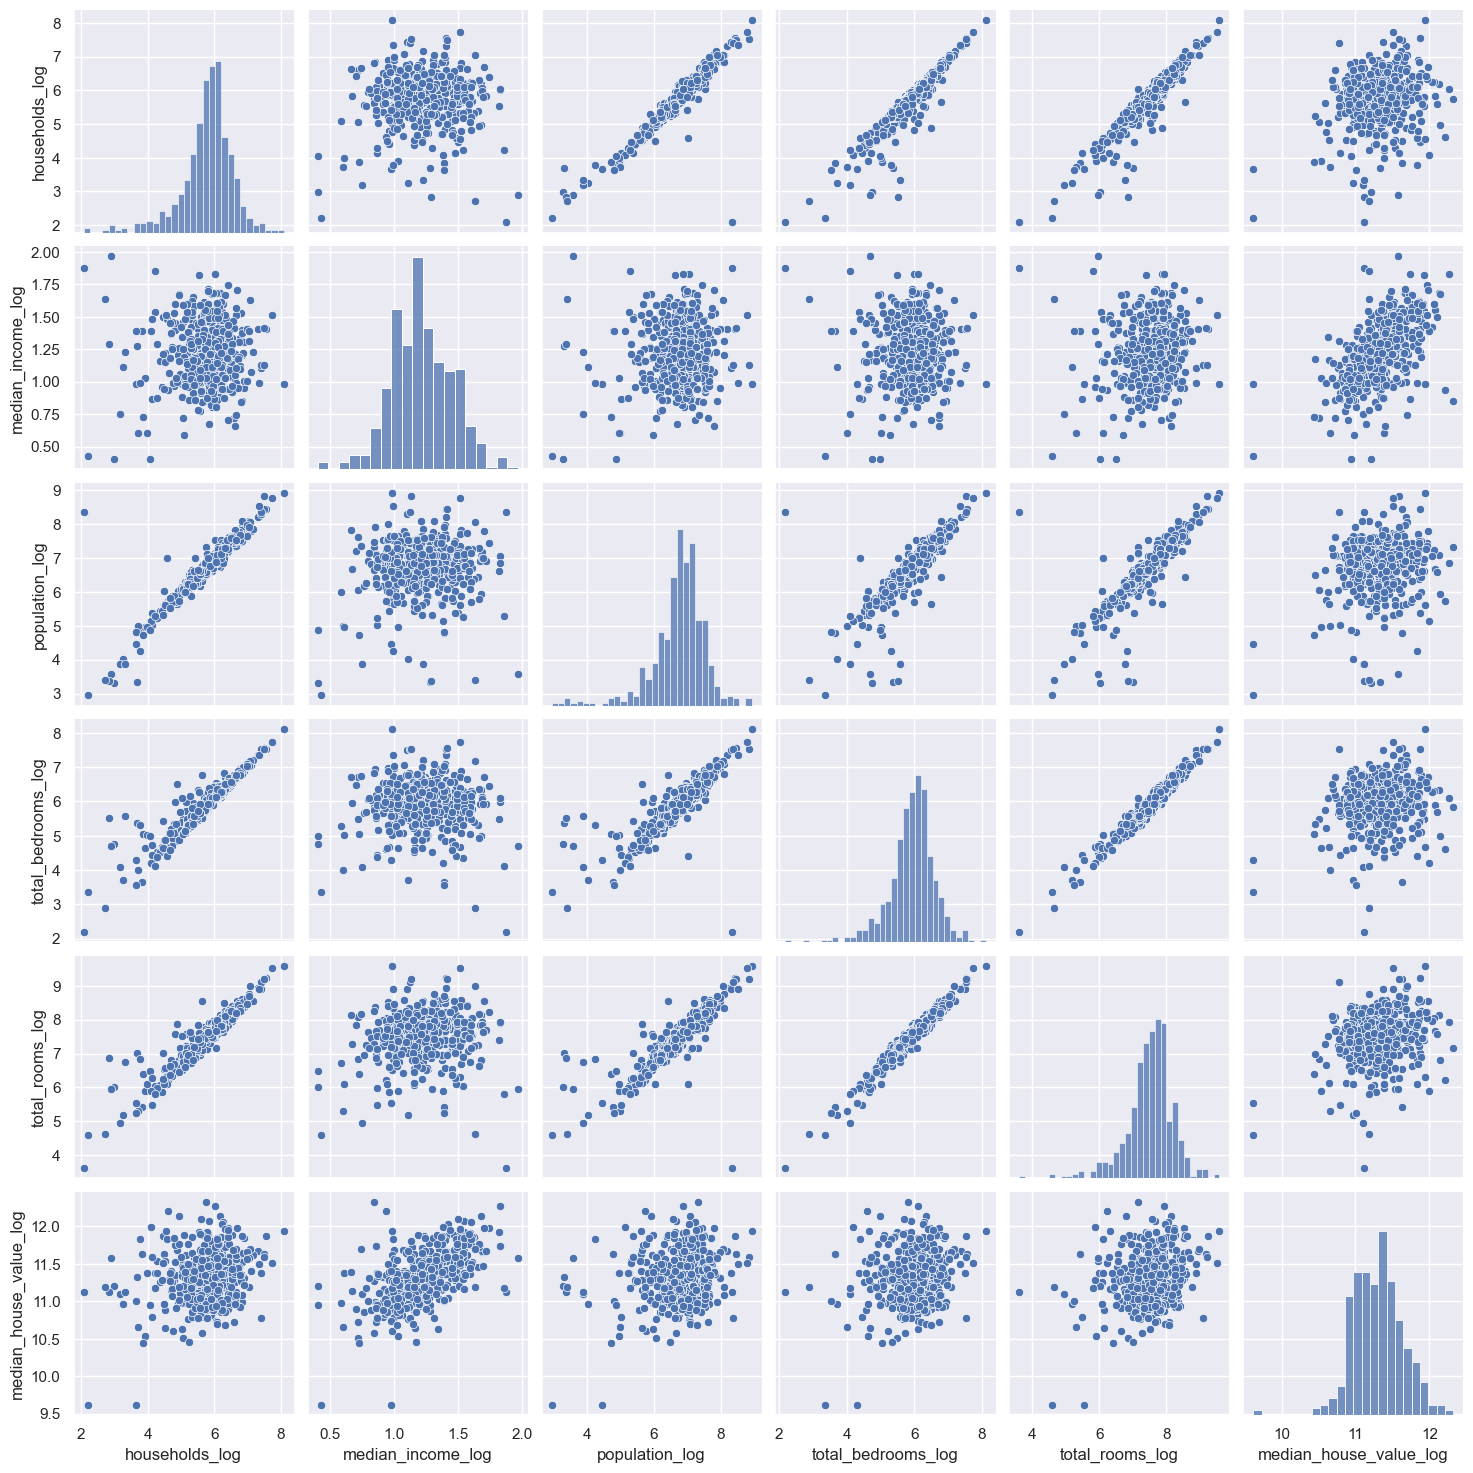

In [37]:
sns.set()
local_coord=[-122, 41] # the point near which we want to look at our variables
euc_dist_th = 2 # distance treshhold

euclid_distance=train_df[['latitude','longitude']].apply(lambda x:
                                                         np.sqrt((x['longitude']-local_coord[0])**2+
                                                                 (x['latitude']-local_coord[1])**2), axis=1)

# indicate wethere the point is within treshhold or not
indicator=pd.Series(euclid_distance<=euc_dist_th, name='indicator')

print("Data points within treshhold:", sum(indicator))

data = pd.concat([train_df,indicator], axis=1)
# a small map to visualize the region for analysis
sns.lmplot(data, x='longitude', y='latitude', 
           hue='indicator', markers ='.', fit_reg=False, height=5)

# pairplot
sns.pairplot(train_df[log_numerical_features+['median_house_value_log']][indicator])

We can see that on any local territory (you can play with local_coord and euc_dist_th) the linear dependences between variables became stronger, especially median_income_log / median_house_value_log. So the coordinates is very important factor for our task (we will analyze it later) 

Now let's move on to the categorical feature "ocean_proximity". It is not 100% clear what does it values means. So let's first of all plot in on the map.

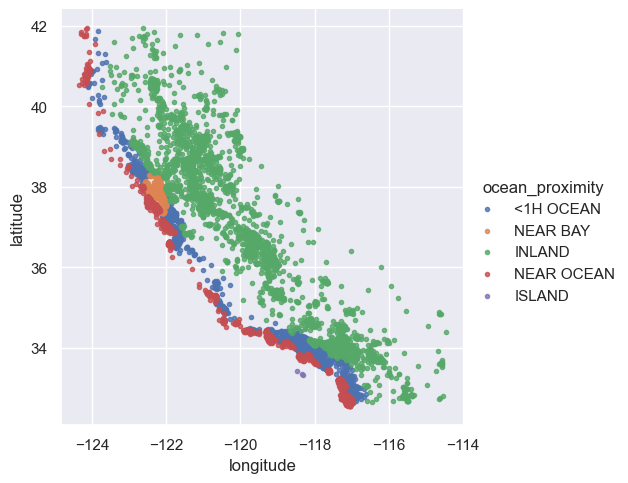

In [39]:
sns.lmplot(x='longitude', y='latitude', data=train_df, markers ='.', hue='ocean_proximity', fit_reg=False, height=5)
plt.show()

Now we better undersand the meaning of different classes. Let's look at the data.

In [40]:
value_count=train_df['ocean_proximity'].value_counts()
value_count

ocean_proximity
<1H OCEAN     6819
INLAND        4929
NEAR OCEAN    1990
NEAR BAY      1739
ISLAND           3
Name: count, dtype: int64

<Axes: title={'center': 'House Value depending on Ocean Proximity'}, xlabel='ocean_proximity', ylabel='median_house_value_log'>

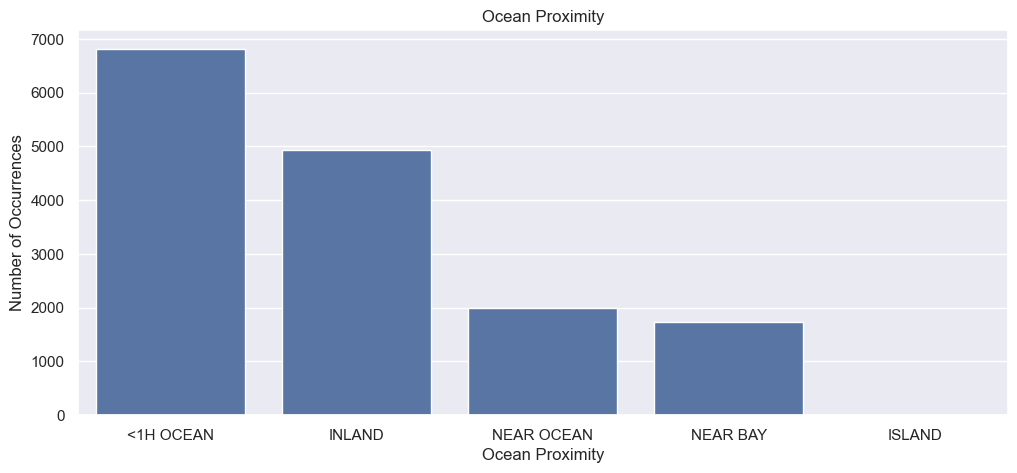

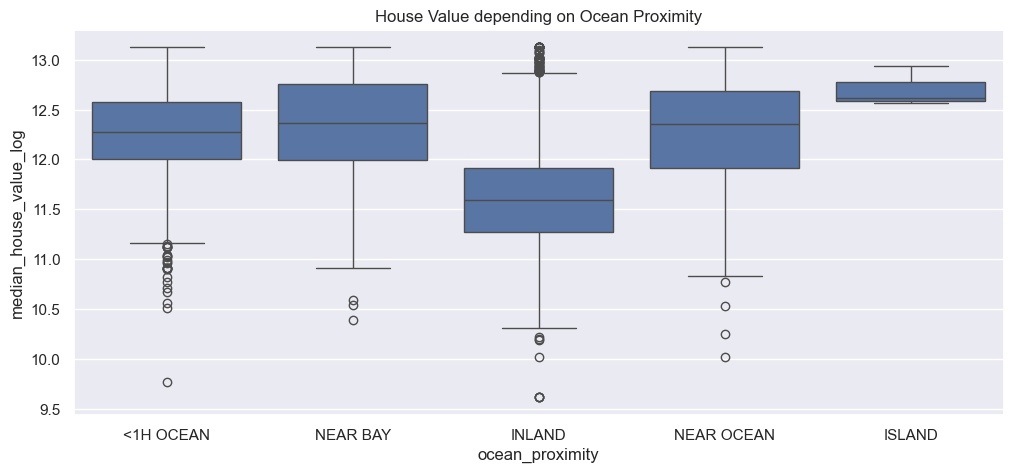

In [42]:
plt.figure(figsize=(12,5))


sns.barplot(value_count)
plt.title('Ocean Proximity')
plt.ylabel('Number of Occurrences')
plt.xlabel('Ocean Proximity')

plt.figure(figsize=(12,5))
plt.title('House Value depending on Ocean Proximity')
sns.boxplot(x="ocean_proximity", y="median_house_value_log", data=train_df)

We can see that INLAND houses has significantly lower prices. Distribution in other differ but not so much. There is no clear trend in house price / poximity, so we will not try to invent complex encoding approach. Let's just do OHE for this feature.

In [43]:
ocean_proximity_dummies = pd.get_dummies(pd.concat([train_df['ocean_proximity'],test_df['ocean_proximity']]),
                                         drop_first=True)

In [44]:
dummies_names=list(ocean_proximity_dummies.columns)

In [45]:
train_df=pd.concat([train_df,ocean_proximity_dummies[:train_df.shape[0]]], axis=1 )
test_df=pd.concat([test_df,ocean_proximity_dummies[train_df.shape[0]:]], axis=1 )

train_df=train_df.drop(['ocean_proximity'], axis=1)
test_df=test_df.drop(['ocean_proximity'], axis=1)

In [46]:
train_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,median_house_value_log,...,median_income_log,population_log,total_bedrooms_log,total_rooms_log,age_clipped,total_bedrooms_is_nan,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
3400,-118.35,34.28,30.0,3214.0,513.0,1700.0,533.0,4.6944,248200.0,12.421994,...,1.739483,7.438972,6.242223,8.075583,False,0,False,False,False,False
9159,-118.45,34.44,16.0,13406.0,2574.0,7030.0,2440.0,4.6861,187900.0,12.143671,...,1.738025,8.858084,7.853605,9.503532,False,0,False,False,False,False
10592,-117.78,33.69,16.0,3400.0,501.0,1575.0,488.0,6.0961,295500.0,12.596427,...,1.959545,7.362645,6.218600,8.131825,False,0,False,False,False,False
4281,-118.32,34.09,27.0,210.0,98.0,332.0,112.0,2.5556,175000.0,12.072547,...,1.268524,5.808142,4.595120,5.351858,False,0,False,False,False,False
230,-122.20,37.79,40.0,1060.0,256.0,667.0,235.0,4.1739,169600.0,12.041204,...,1.643627,6.504288,5.549076,6.966967,False,0,False,False,True,False


And finally we will explore coordinates features.

In [47]:
train_df[['longitude','latitude']].describe()

,longitude,latitude
count,15480.000000,15480.000000
mean,-119.573557,35.636937
std,2.007366,2.141362
min,-124.350000,32.550000
25%,-121.810000,33.930000
50%,-118.510000,34.260000
75%,-118.007500,37.720000
max,-114.470000,41.950000


Let's plot the house_values (target) on map:

<Figure size 1000x1000 with 0 Axes>

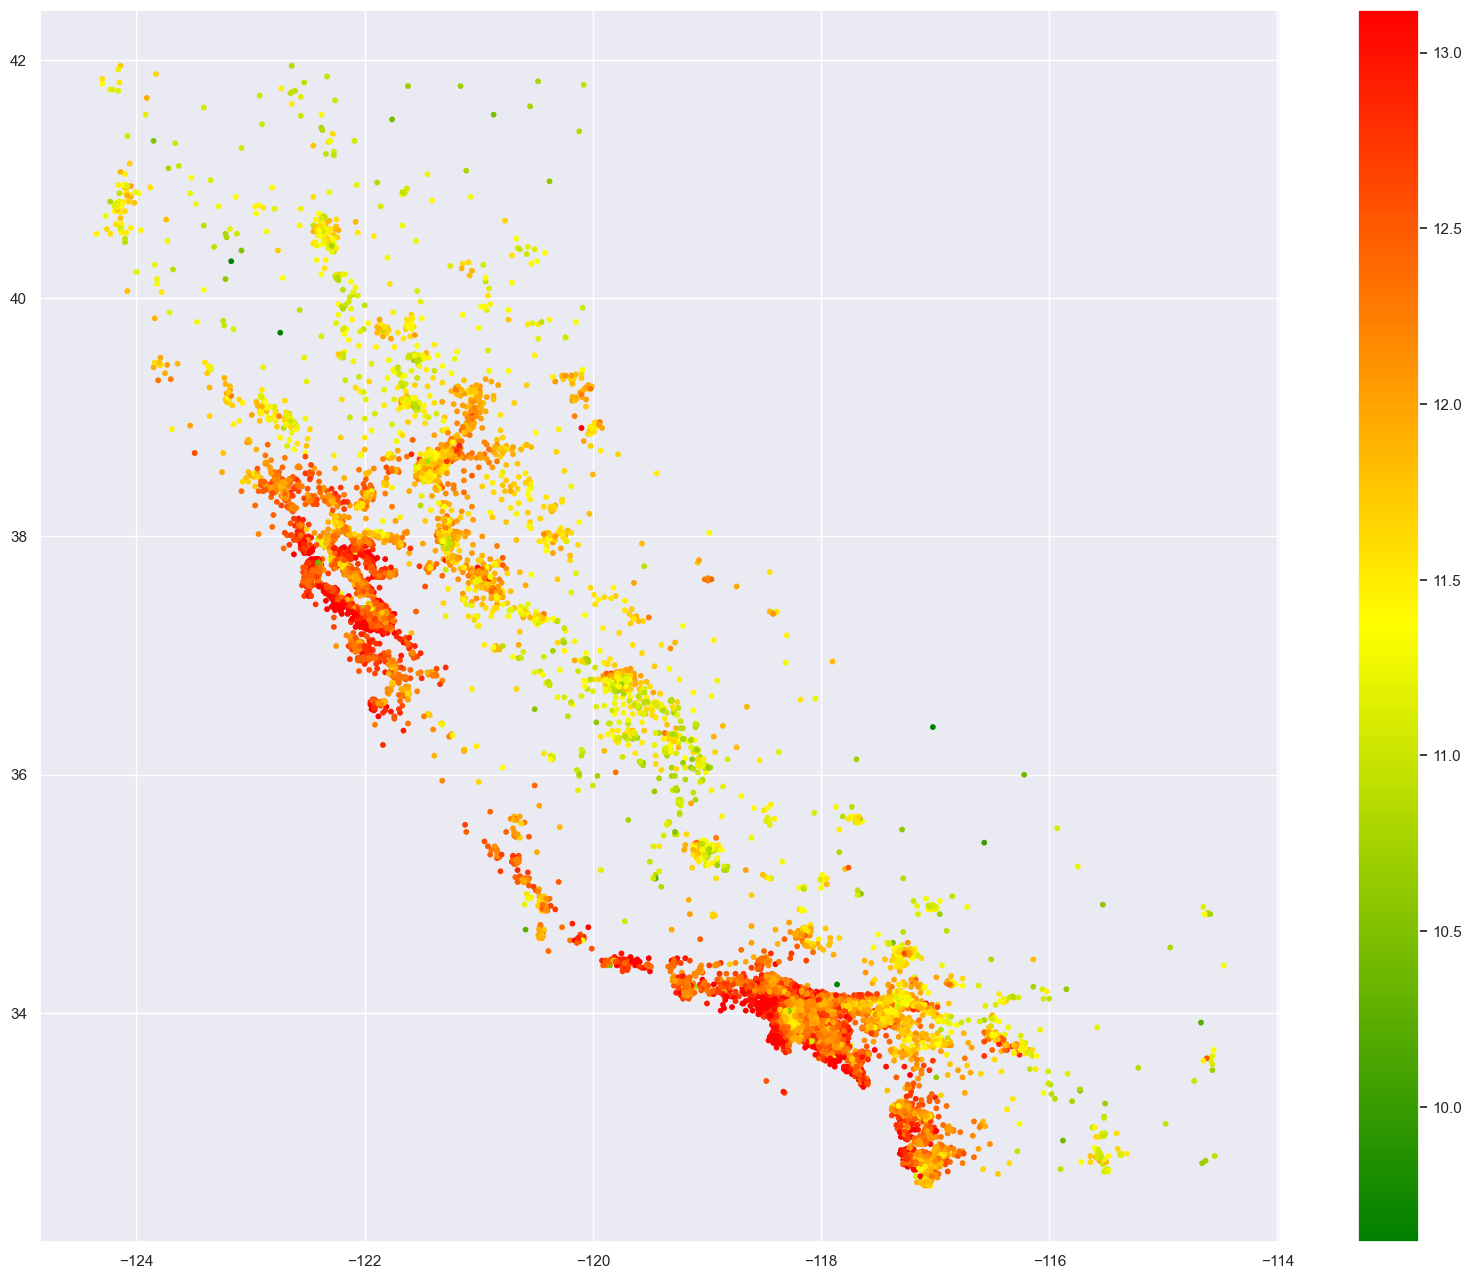

In [48]:
from matplotlib.colors import LinearSegmentedColormap

plt.figure(figsize=(10,10))

cmap = LinearSegmentedColormap.from_list(name='name', colors=['green','yellow','red'])

f, ax = plt.subplots()
points = ax.scatter(train_df['longitude'], train_df['latitude'], 
                    c=train_df['median_house_value_log'],
                    s=10, cmap=cmap)
f.colorbar(points)

It seems that the average value of geographically nearest houses can be very good feature.

We can also see, that the most expensive houses are located near San Francisco (37.7749° N, 122.4194° W) and Los Angeles (34.0522° N, 118.2437°). Based on this we can use the distance to this cities as additional features.

We also see that the most expensive houses are on approximately on the straight line, and become cheaper when we moving to North-East. This means that the linear combination of coordinates themselves can be useful feature as well.

In [49]:
sf_coord=[-122.4194, 37.7749]
la_coord=[-118.2437, 34.0522]

train_df['distance_to_SF']=np.sqrt((train_df['longitude']-sf_coord[0])**2+(train_df['latitude']-sf_coord[1])**2)
test_df['distance_to_SF']=np.sqrt((test_df['longitude']-sf_coord[0])**2+(test_df['latitude']-sf_coord[1])**2)

train_df['distance_to_LA']=np.sqrt((train_df['longitude']-la_coord[0])**2+(train_df['latitude']-la_coord[1])**2)
test_df['distance_to_LA']=np.sqrt((test_df['longitude']-la_coord[0])**2+(test_df['latitude']-la_coord[1])**2)

## 4. Insights and found dependencies

Let's quickly sum up what useful we have found so far:
- We have analyzed the features and found some ~lognorm distributed among them. We have created corresponding log features
- We have analyzed the distribution of the target feature, and concluded that it may be useful to predict log of it (to be checked)
- We have dealt with clipped and missing data
- We have created features corresponding to simple Eucledian distances to LA ans SF
- We also has found several highly correlated variables and maybe will work with them later
- We have already generated several new variables and will create more of them later after the initial modeling phase

All explanation about this steps were already given above.

## 5. Metrics selection

This is regression problem. Our target metric will be RMSE - it is one of the most popular regression metrics, and it has same unit of measurement as target value thus is easy to explain to other people. 

\begin{align}
RMSE = \sqrt{\frac{1}{n}\Sigma_{i=1}^{n}{\Big(\frac{d_i -f_i}{\sigma_i}\Big)^2}}
\end{align}

As far as there is a monotonic dependence between RMSE and MSE we can optimize MSE in our model and compute RMSE only in the end. MSE is easy to optimize it is a default loss function for the most of regression models.

The main drawback of MSE and RMSE - high penalty for big errors in predictions - it can overfit to outliers, but in our case outlaying target values have already been clipped so it is not a big problem.

## 6. Model selection

We will try to solve our problem with 3 different regression models:
- Linear regression
- Random forest
- Gradient boosting

Linear regression is fast, simple and can provide quite a good baseline result for our task.
Tree based models can provide better results in case of nonlinear complex dependences of variables and in case of small number of variables, they are also more stable to multicollinearity (and we have highly correlated variables). Moreover in our problem target values are clipped and targets can't be outside the clipping interval, it is good for the tree-based models.

The results of using these models will be compared in the 11-12 parts of the project. Tree-based models are expected to work better in this particular problem, but we will start with more simple model.

We will start with standard linear regression, go through all of the modeling steps, and then do some simplified computations for 2 other models (without in-depth explanation of every step).

The final model selection will be done based on the results.

## 7. Data preprocessing

We have already done most of the preprocessing steps:
    - OHE for the categorical features
    - Filled NaNs
    - Computed logs of skewed data
    - Divided data into train and hold-out sets

Now let's scale all numerical features (it is useful for the linear models), prepare cross validation splits and we are ready to proceed to modeling

In [50]:
from sklearn.preprocessing import StandardScaler

features_to_scale=numerical_features+log_numerical_features+['distance_to_SF','distance_to_LA']

scaler = StandardScaler()

X_train_scaled=pd.DataFrame(scaler.fit_transform(train_df[features_to_scale]),
                            columns=features_to_scale, index=train_df.index)
X_test_scaled=pd.DataFrame(scaler.transform(test_df[features_to_scale]),
                           columns=features_to_scale, index=test_df.index)

## 8 Cross-validation and adjustment of model hyperparameters 

Let's prepare cross validation samples.
As far as there are not a lot of data we can easily divide it on 10 folds, that are taken from shuffled train data.
Within every split we will train our model on 90% of train data and compute CV metric on the other 10%.

We fix the random state for the reproducibility.

In [51]:
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=10, random_state=17, shuffle=True)

### Linear regression

For the first initial baseline we will take Rigge model with only initial numerical and OHE features

In [52]:
from sklearn.linear_model import Ridge

model=Ridge(alpha=1)
X=train_df[numerical_features+dummies_names]
y=train_df['median_house_value']
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
print(np.sqrt(-cv_scores.mean()))

68701.7197700197


We are doing cross validation with 10 folds, computing 'neg_mean_squared_error' (neg - because sklearn needs scoring functions to be minimized). Our final metrics: RMSE=np.sqrt(-neg_MSE)

So our baseline is RMSE = $68 702 we will try to improve this results using everything we have discovered during the data analysis phase.

We will do the following steps:
    - Use scaled features
    - Add log features 
    - Add NaN and age clip indicating features
    - Add city-distance features
    - Generate several new features
    - Try to predict log(target) instead of target
    - Tune some hyperparameters of the model

Once again the most part of the hyperparameters adjustment will be done later after we add some new features. Actually the cross-validation and parameters tuning process is done through the parts 8-11. 

In [54]:
# using scaled data
X=pd.concat([train_df[dummies_names], X_train_scaled[numerical_features]], axis=1, ignore_index = True)
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
print(np.sqrt(-cv_scores.mean()))

68701.32411496268


In [55]:
# adding NaN indicating feature
X=pd.concat([train_df[dummies_names+['total_bedrooms_is_nan']],
             X_train_scaled[numerical_features]], axis=1, ignore_index = True)
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
print(np.sqrt(-cv_scores.mean()))

68703.83200997641


In [56]:
# adding house age cliiping indicating feature
X=pd.concat([train_df[dummies_names+['age_clipped']],
             X_train_scaled[numerical_features]], axis=1, ignore_index = True)
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
print(np.sqrt(-cv_scores.mean()))

68316.778716409


In [57]:
# adding log features
X=pd.concat([train_df[dummies_names+['age_clipped']], X_train_scaled[numerical_features+log_numerical_features]],
            axis=1, ignore_index = True)
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
print(np.sqrt(-cv_scores.mean()))

66029.2319252146


In [58]:
# adding city distance features
X=pd.concat([train_df[dummies_names+['age_clipped']], X_train_scaled],
            axis=1, ignore_index = True)
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
print(np.sqrt(-cv_scores.mean()))

65418.01578843517


Up to this moment we have got best result using numerical features + their logs + age_clipped+ dummy variables + distances to the largest cities.
Let's try to generate new features

## 9. Creation of new features and description of this process

Previously we have already created and explained the rational of new features creation. Now Let's generate additional ones 

City distances features work, but maybe there are also some non-linear dependencies between them and the target variables.

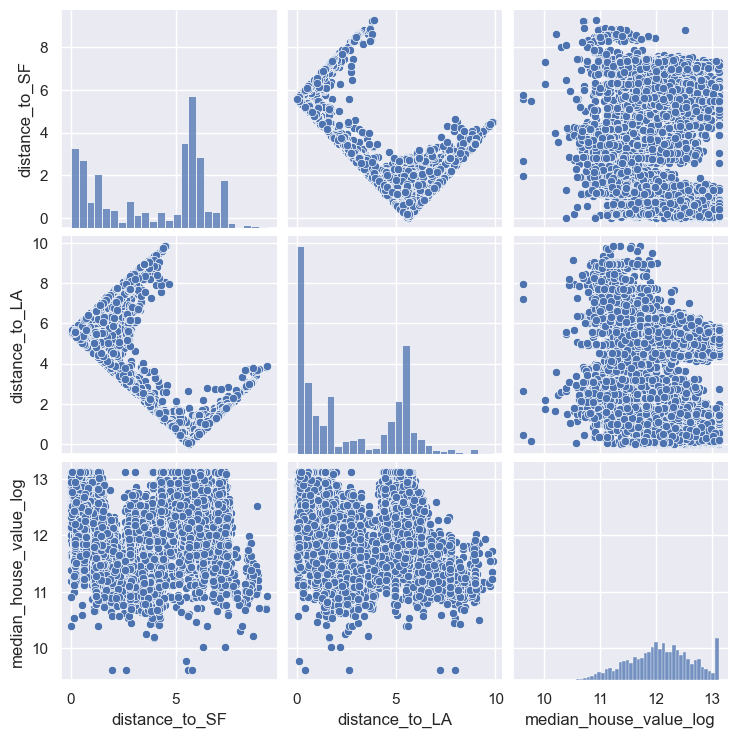

In [59]:
sns.set()
sns.pairplot(train_df[['distance_to_SF','distance_to_LA','median_house_value_log']])

Visually is not obvious so let's try to create a couple of new variables and check:

In [60]:
new_features_train_df=pd.DataFrame(index=train_df.index)
new_features_test_df=pd.DataFrame(index=test_df.index)


new_features_train_df['1/distance_to_SF']=1/(train_df['distance_to_SF']+0.001)
new_features_train_df['1/distance_to_LA']=1/(train_df['distance_to_LA']+0.001)
new_features_train_df['log_distance_to_SF']=np.log1p(train_df['distance_to_SF'])
new_features_train_df['log_distance_to_LA']=np.log1p(train_df['distance_to_LA'])

new_features_test_df['1/distance_to_SF']=1/(test_df['distance_to_SF']+0.001)
new_features_test_df['1/distance_to_LA']=1/(test_df['distance_to_LA']+0.001)
new_features_test_df['log_distance_to_SF']=np.log1p(test_df['distance_to_SF'])
new_features_test_df['log_distance_to_LA']=np.log1p(test_df['distance_to_LA'])

We can also generate some features correlated to the prosperity:
- rooms/person - how many rooms are there per person. The higher - the richer people are living there - the more expensive houses they buy
- rooms/household - how many rooms are there per family. The similar one but corresponds to the number of rooms per family (assuming household~family), not per person.
- two similar features but counting only bedrooms

In [61]:
new_features_train_df['rooms/person']=train_df['total_rooms']/train_df['population']
new_features_train_df['rooms/household']=train_df['total_rooms']/train_df['households']

new_features_test_df['rooms/person']=test_df['total_rooms']/test_df['population']
new_features_test_df['rooms/household']=test_df['total_rooms']/test_df['households']


new_features_train_df['bedrooms/person']=train_df['total_bedrooms']/train_df['population']
new_features_train_df['bedrooms/household']=train_df['total_bedrooms']/train_df['households']

new_features_test_df['bedrooms/person']=test_df['total_bedrooms']/test_df['population']
new_features_test_df['bedrooms/household']=test_df['total_bedrooms']/test_df['households']

- the luxurity of house can be characterized buy number of bedrooms per rooms

In [62]:
new_features_train_df['bedroom/rooms']=train_df['total_bedrooms']/train_df['total_rooms']
new_features_test_df['bedroom/rooms']=test_df['total_bedrooms']/test_df['total_rooms']

- the average number of persons in one household can be the signal of prosperity or the same time the signal of richness but in any case it can be a useful feature

In [63]:
new_features_train_df['average_size_of_household']=train_df['population']/train_df['households']
new_features_test_df['average_size_of_household']=test_df['population']/test_df['households']

And finally let's scale all this features

In [64]:
new_features_train_df=pd.DataFrame(scaler.fit_transform(new_features_train_df),
                            columns=new_features_train_df.columns, index=new_features_train_df.index)

new_features_test_df=pd.DataFrame(scaler.transform(new_features_test_df),
                            columns=new_features_test_df.columns, index=new_features_test_df.index)

In [65]:
new_features_train_df.head()

,1/distance_to_SF,1/distance_to_LA,log_distance_to_SF,log_distance_to_LA,rooms/person,rooms/household,bedrooms/person,bedrooms/household,bedroom/rooms,average_size_of_household
3400,-0.220070,0.293305,0.672435,-1.128013,-0.078351,0.228182,-0.405337,-0.271410,-0.911534,0.006140
9159,-0.219115,-0.040686,0.630292,-0.935963,-0.064367,0.018403,-0.148111,-0.086113,-0.353076,-0.019597
10592,-0.223714,-0.154210,0.850102,-0.800596,0.150542,0.595147,-0.340090,-0.142797,-1.122943,0.009309
4281,-0.220810,1.803470,0.706231,-1.323701,-1.152262,-1.398744,-0.431643,-0.446755,4.382670,-0.012657
230,0.421744,-0.453060,-1.756723,1.121867,-0.335619,-0.366742,-0.077539,-0.017071,0.500505,-0.023174


In [66]:
new_features_test_df.head()

,1/distance_to_SF,1/distance_to_LA,log_distance_to_SF,log_distance_to_LA,rooms/person,rooms/household,bedrooms/person,bedrooms/household,bedroom/rooms,average_size_of_household
18403,-0.060341,-0.448252,-1.194064,0.978939,0.005908,0.446584,-0.331923,-0.075563,-0.888829,0.016335
13405,-0.223680,-0.238090,0.848279,-0.640258,-0.280996,-0.033070,0.165146,0.689931,0.972822,0.010682
9539,-0.163285,-0.441761,-0.560282,0.814415,-0.952759,-0.611435,-0.796661,-0.368007,0.393340,0.114335
8668,-0.221446,0.227769,0.736154,-1.102938,0.228172,-0.509465,0.792522,0.021683,0.946990,-0.106251
9019,-0.218810,-0.128914,0.617209,-0.836826,0.323990,0.895651,-0.340661,-0.113589,-1.342553,0.013256


We will add new features one by one and keeps only those that improve our best score

In [67]:
# computing current best score

X=pd.concat([train_df[dummies_names+['age_clipped']], X_train_scaled],
            axis=1, ignore_index = True)

cv_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
best_score = np.sqrt(-cv_scores.mean())
print("Best score: ", best_score)

# list of the new good features
new_features_list=[]

for feature in new_features_train_df.columns:
    new_features_list.append(feature)
    X=pd.concat([train_df[dummies_names+['age_clipped']], X_train_scaled,
                 new_features_train_df[new_features_list]
                ],
                axis=1, ignore_index = True)
    cv_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
    score = np.sqrt(-cv_scores.mean())
    if score >= best_score:
        new_features_list.remove(feature)
        print(feature, ' is not a good feature')
    else:
        print(feature, ' is a good feature')
        print('New best score: ', score)
        best_score=score

Best score:  65418.01578843517
1/distance_to_SF  is a good feature
New best score:  64889.606083630584
1/distance_to_LA  is a good feature
New best score:  64833.156492366776
log_distance_to_SF  is a good feature
New best score:  64440.49789122941
log_distance_to_LA  is a good feature
New best score:  64103.711571345055
rooms/person  is not a good feature
rooms/household  is not a good feature
bedrooms/person  is not a good feature
bedrooms/household  is not a good feature
bedroom/rooms  is a good feature
New best score:  63980.82745630177
average_size_of_household  is not a good feature


We have got 5 new good features. Let's update our X variable

In [68]:
X=pd.concat([train_df[dummies_names+['age_clipped']], X_train_scaled,
             new_features_train_df[new_features_list]
            ],
            axis=1).reset_index(drop=True)
y=train_df['median_house_value'].reset_index(drop=True)

To deal with log of target we need to create our own cross validation or our own predicting model. We will try the first option

In [69]:
from sklearn.metrics import mean_squared_error

def cross_val_score_with_log(model=model, X=X,y=y,kf=kf, use_log=False):

    X_temp=np.array(X)

    # if use_log parameter is true we will predict log(y+1)
    if use_log:
        y_temp=np.log1p(y)
    else:
        y_temp=np.array(y)
    
    cv_scores=[]
    for train_index, test_index in kf.split(X_temp,y_temp):

        prediction = model.fit(X_temp[train_index], y_temp[train_index]).predict(X_temp[test_index])
        
        # if use_log parameter is true we should come back to the initial targer
        if use_log:
            prediction=np.expm1(prediction)
        cv_scores.append(-mean_squared_error(y[test_index],prediction))

    return np.sqrt(-np.mean(cv_scores))

In [70]:
cross_val_score_with_log(X=X,y=y,kf=kf, use_log=False)

63980.82745630179

We have got exactly the same result as with cross_val_score function. That means everything work ok. Now let's try to set use_log to true

In [71]:
cross_val_score_with_log(X=X,y=y,kf=kf, use_log=True)

65213.18040362186

Unfortunately, it has not helped. So we will stick to the previous version.

And now we will tune the only meaningful hyperparameter of the Ridge regression - alpha.

## 10. Plotting training and validation curves

Let's plot Validation Curve

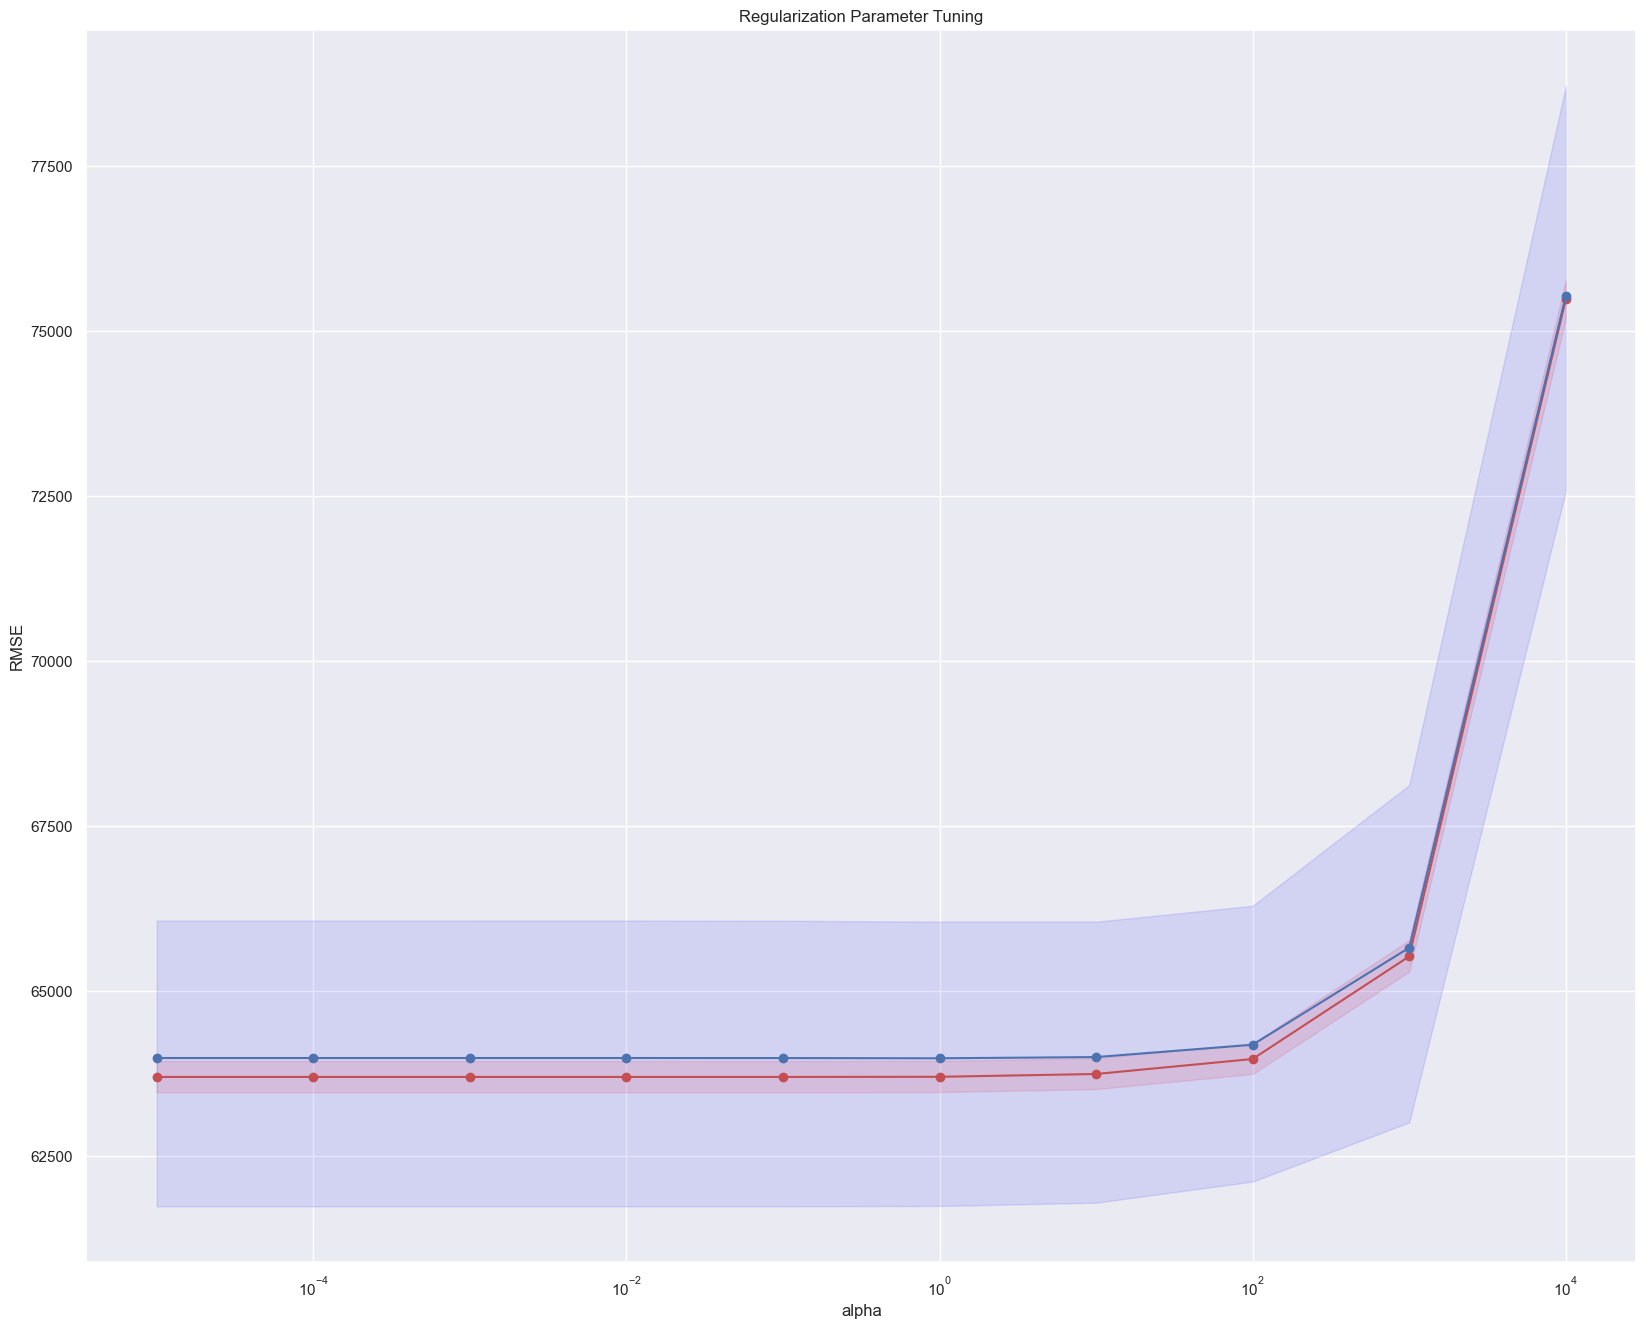

In [73]:
from sklearn.model_selection import validation_curve

Cs=np.logspace(-5, 4, 10)
train_scores, valid_scores = validation_curve(model, X, y, param_name="alpha", 
                                              param_range=Cs, cv=kf, scoring='neg_mean_squared_error')

plt.plot(Cs, np.sqrt(-train_scores.mean(axis=1)), 'ro-')

plt.fill_between(x=Cs, y1=np.sqrt(-train_scores.max(axis=1)), 
                 y2=np.sqrt(-train_scores.min(axis=1)), alpha=0.1, color = "red")


plt.plot(Cs, np.sqrt(-valid_scores.mean(axis=1)), 'bo-')

plt.fill_between(x=Cs, y1=np.sqrt(-valid_scores.max(axis=1)), 
                 y2=np.sqrt(-valid_scores.min(axis=1)), alpha=0.1, color = "blue")

plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.title('Regularization Parameter Tuning')

plt.show()

In [74]:
Cs[np.sqrt(-valid_scores.mean(axis=1)).argmin()]

1.0

We can see that curves for train and CV are very close to each other, it is a sign of underfiting. The difference between the curves does not change along with change in alpha this mean that we should try more complex models comparing to linear regression or add more new features (f.e. polynomial ones)

Using this curve we can find the optimal value of alpha. It is alpha=1. But actually our prediction does not change when alpha goes below 1.

Let's use alpha=1 and plot the learning curve

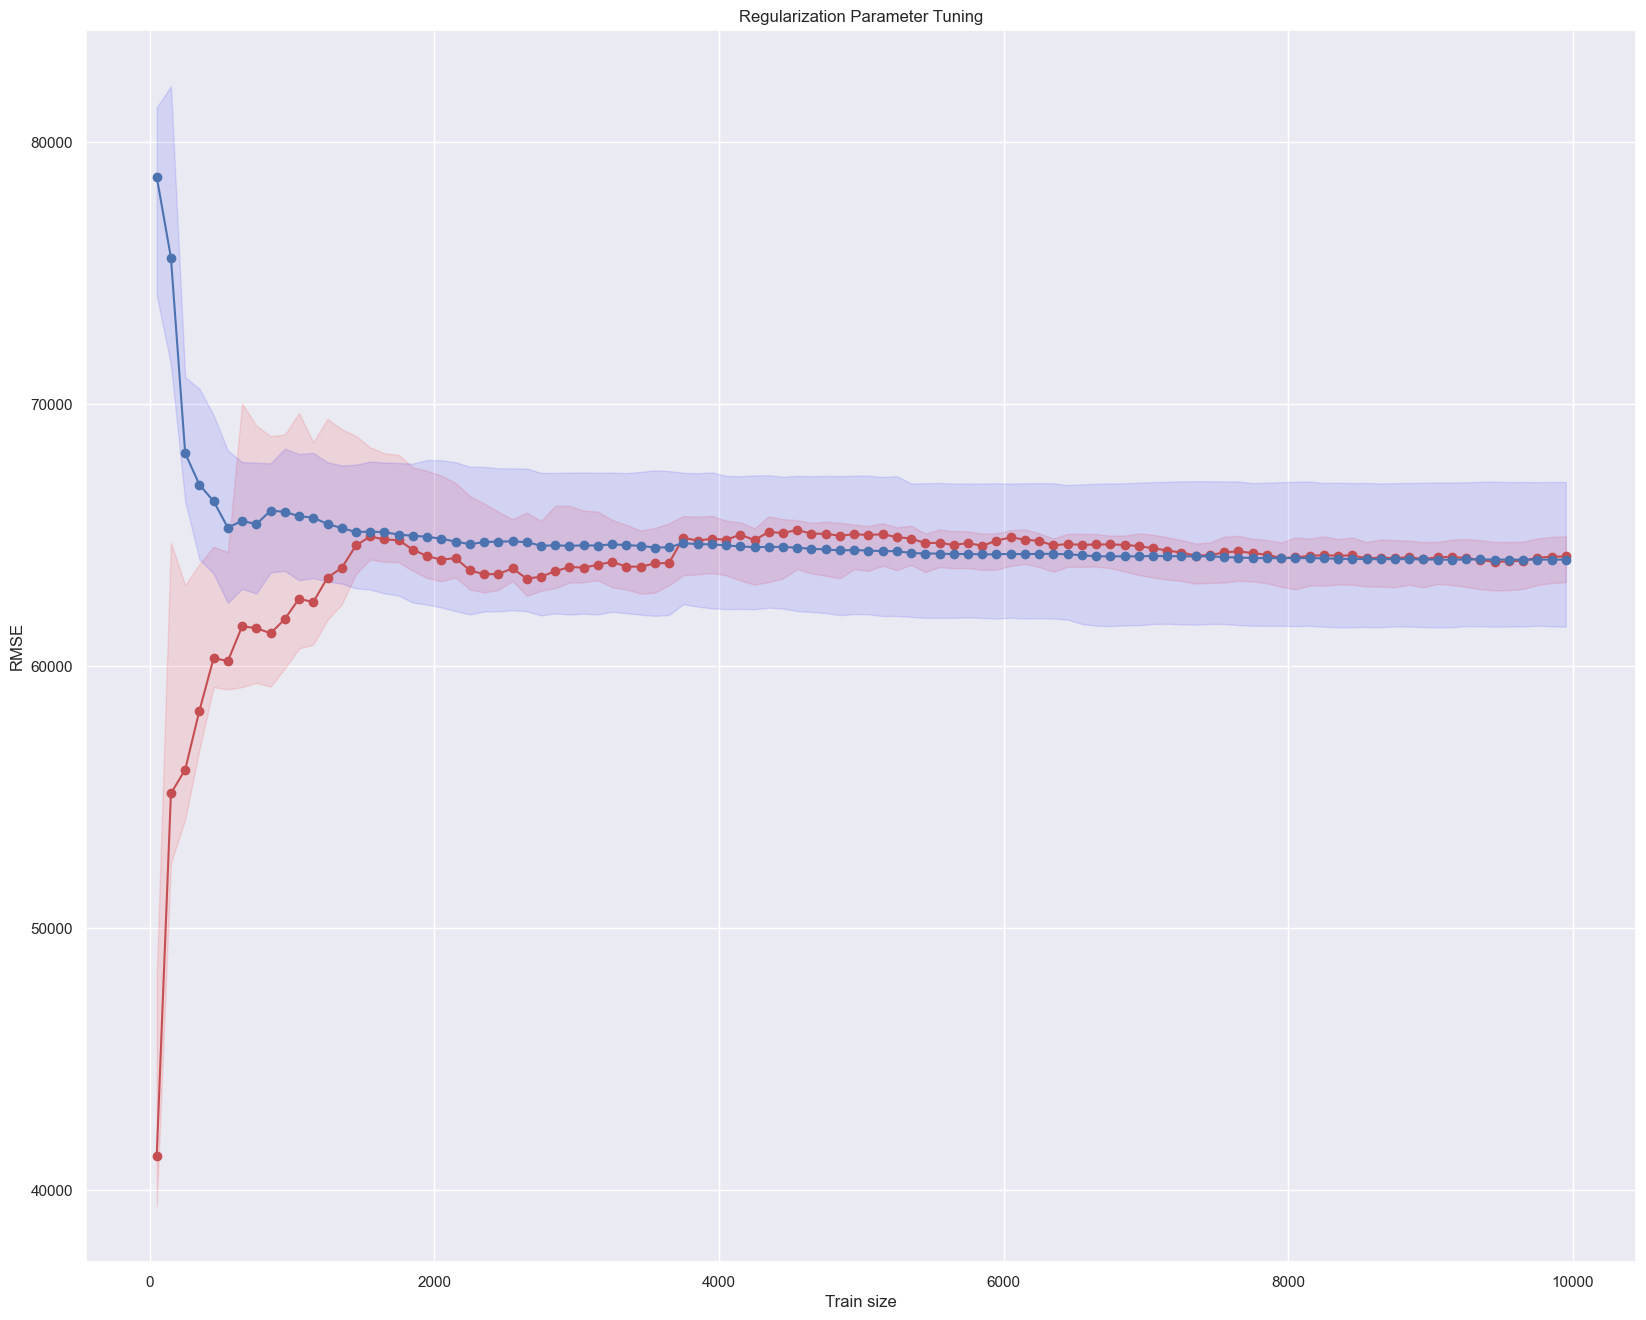

In [75]:
from sklearn.model_selection import learning_curve

model=Ridge(alpha=1.0)

train_sizes, train_scores, valid_scores = learning_curve(model, X, y, train_sizes=list(range(50,10001,100)),
                                                         scoring='neg_mean_squared_error', cv=5)

plt.plot(train_sizes, np.sqrt(-train_scores.mean(axis=1)), 'ro-')

plt.fill_between(x=train_sizes, y1=np.sqrt(-train_scores.max(axis=1)), 
                 y2=np.sqrt(-train_scores.min(axis=1)), alpha=0.1, color = "red")

plt.plot(train_sizes, np.sqrt(-valid_scores.mean(axis=1)), 'bo-')

plt.fill_between(x=train_sizes, y1=np.sqrt(-valid_scores.max(axis=1)), 
                 y2=np.sqrt(-valid_scores.min(axis=1)), alpha=0.1, color = "blue")

plt.xlabel('Train size')
plt.ylabel('RMSE')
plt.title('Regularization Parameter Tuning')

plt.show()

Learning curves indicate high bias of the model - this means we will not improve our model by adding more data, but we can try to use more complex models or add more features to improve the results.

This result is inline with the validation curve results. So let's move on to the more complex models.

### Random forest

Actually we can just put all our features into the model but we can easily improve computational performance of the tree-based models, by deleting all monotonous derivatives of features because they does not help at all.

For example, adding log(feature) don't help tree-based model, it will just make it more computationally intensive.

So let's train random forest classifier based on shorten set of the features

In [76]:
X.columns

Index(['INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN', 'age_clipped',
       'longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'households_log', 'median_income_log', 'population_log',
       'total_bedrooms_log', 'total_rooms_log', 'distance_to_SF',
       'distance_to_LA', '1/distance_to_SF', '1/distance_to_LA',
       'log_distance_to_SF', 'log_distance_to_LA', 'bedroom/rooms'],
      dtype='object')

In [77]:
features_for_trees=['INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN', 'age_clipped',
       'longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'distance_to_SF', 'distance_to_LA','bedroom/rooms']       

In [78]:
%%time
from sklearn.ensemble import RandomForestRegressor

X_trees=X[features_for_trees]

model_rf=RandomForestRegressor(n_estimators=100, random_state=17)
cv_scores = cross_val_score(model_rf, X_trees, y, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)

print(np.sqrt(-cv_scores.mean()))

47825.10584481394
CPU times: user 89.5 ms, sys: 36.5 ms, total: 126 ms
Wall time: 25.7 s


We can see significant improvement, comparing to the linear model and higher n_estimator probably will help. But first, let's try to tune other hyperparametres:

In [80]:
from sklearn.model_selection import GridSearchCV

param_grid={'n_estimators': [100],
            'max_depth':  [22, 23, 24, 25],
            'max_features': [5,6,7,8]}

gs=GridSearchCV(model_rf, param_grid, scoring='neg_mean_squared_error', n_jobs=-1, cv=kf, verbose=1)

gs.fit(X_trees,y)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=17, shuffle=True),
             estimator=RandomForestRegressor(random_state=17), n_jobs=-1,
             param_grid={'max_depth': [22, 23, 24, 25],
                         'max_features': [5, 6, 7, 8], 'n_estimators': [100]},
             scoring='neg_mean_squared_error', verbose=1)

In [81]:
print(np.sqrt(-gs.best_score_))

45594.76217538583


In [82]:
gs.best_params_

{'max_depth': 23, 'max_features': 5, 'n_estimators': 100}

In [83]:
best_depth=gs.best_params_['max_depth']
best_features=gs.best_params_['max_features']

In [84]:
%%time
model_rf=RandomForestRegressor(n_estimators=100, max_depth=best_depth, max_features=best_features, random_state=17)
cv_scores = cross_val_score(model_rf, X_trees, y, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)

print(np.sqrt(-cv_scores.mean()))

45594.76217538583
CPU times: user 28.4 ms, sys: 9.57 ms, total: 38 ms
Wall time: 8.28 s


With the relatively small effort we have got a significant improvement of results. Random Forest results can be further improved by higher n_estimators, let's find the n_estimators at witch the results stabilize. 

In [86]:
model_rf=RandomForestRegressor(n_estimators=200,  max_depth=best_depth, max_features=best_features, random_state=17)
Cs=list(range(20,201,20))
train_scores, valid_scores = validation_curve(
    model_rf, X_trees, y,
    param_name= "n_estimators", 
    param_range=Cs, 
    cv=kf,
    scoring='neg_mean_squared_error'
)

plt.plot(Cs, np.sqrt(-train_scores.mean(axis=1)), 'ro-')

plt.fill_between(x=Cs, y1=np.sqrt(-train_scores.max(axis=1)), 
                 y2=np.sqrt(-train_scores.min(axis=1)), alpha=0.1, color = "red")


plt.plot(Cs, np.sqrt(-valid_scores.mean(axis=1)), 'bo-')

plt.fill_between(x=Cs, y1=np.sqrt(-valid_scores.max(axis=1)), 
                 y2=np.sqrt(-valid_scores.min(axis=1)), alpha=0.1, color = "blue")

plt.xlabel('n_estimators')
plt.ylabel('RMSE')
plt.title('Regularization Parameter Tuning')

plt.show()

This time we can see that the results of train is much better than CV, but it is totally ok for the Random Forest. 

Higher value of n_estimators (>100) does not help much. Let's stick to the n_estimators=200 - it is high enough but not very computationally intensive.

### Gradient boosting

And finally we will try to use LightGBM to solve our problem.
We will try the model out of the box, and then tune some of its parameters using random search

In [ ]:
# uncomment to install if you have not yet
#!pip install lightgbm

In [ ]:
%%time
from lightgbm.sklearn import LGBMRegressor

model_gb=LGBMRegressor()
cv_scores = cross_val_score(model_gb, X_trees, y, cv=kf, scoring='neg_mean_squared_error', n_jobs=1)

print(np.sqrt(-cv_scores.mean()))

LGBMRegressor has much more hyperparameters than previous models. As far as this is educational problem we will not spend a lot of time to tuning all of them. In this case RandomizedSearchCV can give us very good result quite fast, much faster than GridSearch. We will do optimization in 2 steps: model complexity optimization and convergence optimization. Let's do it.

In [ ]:
gs

In [ ]:
# model complexity optimization
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

param_grid={'max_depth':  randint(6,11),
            'num_leaves': randint(7,127),
            'reg_lambda': np.logspace(-3,0,100),
            'random_state': [17]}

gs=RandomizedSearchCV(model_gb, param_grid, n_iter = 50, scoring='neg_mean_squared_error', fit_params=None, 
                n_jobs=-1, cv=kf, verbose=1, random_state=17)

gs.fit(X_trees,y)

In [ ]:
np.sqrt(-gs.best_score_)

In [ ]:
gs.best_params_

Let's fix n_estimators=500, it is big enough but is not to computationally intensive yet, and find the best value of the learning_rate

In [ ]:
# model convergency optimization

param_grid={'n_estimators': [500],
            'learning_rate': np.logspace(-4, 0, 100),
            'max_depth':  [10],
            'num_leaves': [72],
            'reg_lambda': [0.0010722672220103231],
            'random_state': [17]}

gs=RandomizedSearchCV(model_gb, param_grid, n_iter = 20, scoring='neg_mean_squared_error', fit_params=None, 
                n_jobs=-1, cv=kf, verbose=1, random_state=17)

gs.fit(X_trees,y)

In [ ]:
np.sqrt(-gs.best_score_)

In [ ]:
gs.best_params_

We have got the best params for the gradient boosting and will use them for the final prediction.

## 11. Prediction for test or hold-out samples

Lets sum up the results of our project. We will compute RMSE on cross validation and holdout set and compare them.

In [ ]:
results_df=pd.DataFrame(columns=['model','CV_results', 'holdout_results'])

In [ ]:
# hold-out features and target 
X_ho=pd.concat([test_df[dummies_names+['age_clipped']], X_test_scaled,
             new_features_test_df[new_features_list]],axis=1).reset_index(drop=True)
y_ho=test_df['median_house_value'].reset_index(drop=True)

X_trees_ho=X_ho[features_for_trees]

In [ ]:
%%time

#linear model
model=Ridge(alpha=1.0)

cv_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
score_cv=np.sqrt(-np.mean(cv_scores.mean()))


prediction_ho = model.fit(X, y).predict(X_ho)
score_ho=np.sqrt(mean_squared_error(y_ho,prediction_ho))

results_df.loc[results_df.shape[0]]=['Linear Regression',  score_cv,  score_ho]

In [ ]:
%%time

#Random Forest
model_rf=RandomForestRegressor(n_estimators=200,  max_depth=23, max_features=5, random_state=17)

cv_scores = cross_val_score(model_rf, X_trees, y, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
score_cv=np.sqrt(-np.mean(cv_scores.mean()))


prediction_ho = model_rf.fit(X_trees, y).predict(X_trees_ho)
score_ho=np.sqrt(mean_squared_error(y_ho,prediction_ho))

results_df.loc[results_df.shape[0]]=['Random Forest',  score_cv,  score_ho]

In [ ]:
%%time

#Gradient boosting
model_gb=LGBMRegressor(reg_lambda=0.0010722672220103231, max_depth=10,
                       n_estimators=500, num_leaves=72, random_state=17, learning_rate=0.06734150657750829)
cv_scores = cross_val_score(model_gb, X_trees, y, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
score_cv=np.sqrt(-np.mean(cv_scores.mean()))

prediction_ho = model_gb.fit(X_trees, y).predict(X_trees_ho)
score_ho=np.sqrt(mean_squared_error(y_ho,prediction_ho))

results_df.loc[results_df.shape[0]]=['Gradient boosting',  score_cv,  score_ho]

In [ ]:
results_df

It seems we have done quite a good job. Cross validation results are inline with holdout ones. Our best CV model - gradient boosting, turned out to be the best on hold-out dataset as well (and it is also faster than random forest).

## 12. Conclusions

To sum up, we have got the solution that can predict the mean house value in the block with RMSE \$46k using our best model - LGB. It is not an extremely precise prediction: \$46k is about 20% of the average mean house price, but it seems that it is near the possible solution for these classes of model based on this data (it is popular dataset but I have not find any solution with significantly better results). 

We have used old Californian data from 1990 so it is not useful right now. But the same approach can be used to predict modern house prices (if applied to the resent market data).

We have done a lot but the results surely can be improved, at least one could try:

- feature engineering: polynomial features, better distances to cities (not Euclidean ones, ellipse representation of cities), average values of target for the geographically closest neighbours (requires custom estimator function for correct cross validation)
- PCA for dimensionality reduction (I have mentioned it but didn't used)
- other models (at least KNN and SVM can be tried based on data)
- more time and effort can be spent on RF and LGB parameters tuning